# Turingovy vzorky - Schnakenbergova nelinearita

\begin{align*}
u_t &= u_{xx} + \gamma f(u,v),\\
v_t &= dv_{xx} + \gamma g(u,v)\\
\end{align*}

Konkrétně při použití Schnakenbergovy nelinearity
\begin{align*}
u_t &= u_{xx} + \gamma (a-u+u^2v),\\
v_t &= dv_{xx} + \gamma (b-u^2v)\\
\end{align*}

In [1]:
import sympy as sy
import numpy as np
import pde
import matplotlib.pyplot as plt
from IPython.display import display, Math

sy.init_printing()

plt.rcParams['figure.figsize'] = [8, 8]
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})

## Příprava parametrů $a, b, d, \gamma$

Předpokladem je $a \geq 0, b\geq 0.$
Začneme tím, že zvolíme $a = 0$. Ostatní parametry pak dopočteme pomocí následujících podmínek. 

**P1**: $f_u + g_v < 0,$  
**P2**: $f_u g_v - f_v g_u < 0,$  
**P3**: $d f_u + g_v > 0,$  
**P4**: $\frac{(d f_u + g_v)^2}{4d} > f_u g_v - f_v g_u,$

které aplikujeme na funkce $f,g$ dané Schnackenbergovou nelinearitou a pro nestabilní stacionární řešení získáme následující.

$b > a$  
Z **P1**: $ 0 < b-a < (a+b)^3$  
Z **P2**: $(a+b)^2 > 0$  
Z **P3**: $d(b-a) > (a+b)^3$  
Z **P4**: $(d(b-a) - (a+b)^3 > 4d(a+b)^4$

Můžeme zvolit $a=0$ a následně se pokusíme tuto soustavu nerovnic vyřešit.


In [4]:
a, b, d, gamma, lam, u, v, k, K, l, n = sy.symbols('a b d gamma lambda u v k K l n', real=True)

# volba a
aa = 0
display(Math(f'a = {aa}'))

# výpočet b jako průnik podmínek. b = dolní hranice + 1
b1_sol = sy.solve_univariate_inequality( b > aa, b, relational=False)
b2_sol = sy.solve_univariate_inequality( (b-aa) < (aa+b)**3, b, relational=False)
b_sol = sy.Intersection(b1_sol, b2_sol)
display(Math('b \in '+sy.latex(b_sol)))

bb = b_sol.left
bb += 1
display(Math(f'b = {bb}'))

# výpočet d jako průnik podmínek P3 a P4. d = dolní hranice + 6
d1_sol = sy.solve_univariate_inequality(d*(bb-aa) > (aa+bb)**3, d, relational=False)
d2_sol = sy.solve_univariate_inequality((d*(bb-aa)-(aa+bb)**3)**2 > 4*d*(aa+bb)**4, d, relational=False)
d_sol = sy.Intersection(d1_sol, d2_sol)
display(Math('d \in '+sy.latex(d_sol)))
dd = sy.ceiling(d_sol.left)+6
display(Math(f'd = {dd}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Stacionární řešení a Jacobiova matice bezprostorového modelu

In [7]:
f = aa - u + u**2 * v
g = bb - u**2 * v

sb_sol = sy.solve((f,g),(u,v))
display(Math(rf'\text{{Stacionární řešení }} (u,v) = {sy.latex(sb_sol[0])}'))

J = (sy.Matrix([f,g])).jacobian([u,v])
display(Math(rf'\text{{Jacobiova matice }} J = {sy.latex(J)}'))

Jsb = J.subs([(u,sb_sol[0][0]), (v,sb_sol[0][1])])
display(Math(rf'\text{{Jacobiova matice ve stacionárním bodě }} J{sb_sol[0]} = {sy.latex(Jsb)}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Vlastní čísla prostorového modelu

In [8]:
PM_mat = lam*sy.eye(2) - gamma*Jsb + sy.Matrix([[k**2, 0],[0, d*k**2]])

display(Math(rf'\text{{Matice prostorového modelu }}: {sy.latex(PM_mat)}'))

char_pol = sy.Poly(PM_mat.det(), lam)
display(Math(rf'\text{{ Charakteristický polynom }}: {sy.latex(char_pol)}'))
Psi = char_pol.all_coeffs()[2]
Phi = char_pol.all_coeffs()[1]
display(Math(rf'\text{{Vlastní čísla }}: {sy.latex(sy.solve(char_pol, lam))}'))

# v Psi nahradíme k^2 za K
display(Math(rf'\Psi :{sy.latex(Psi)}'))
PsiK = Psi.subs(k**2,K)
display(Math(rf'\Psi \text{{ s }} K:{sy.latex(PsiK)}'))
K_allowed = sy.solve(PsiK, K)
display(Math(rf'\text{{Přípustné }}K:{sy.latex(K_allowed)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Nastavení paramaterů pro numerické řešení

Musíme zvolit délku intervalu $l$ a také parametr $\gamma$. Oba parametry ovlivňují kritické vlnové délky a tím i tvar vzorků. 

In [10]:
Kd_allowed = [K_allowed[0].subs(d,dd),K_allowed[1].subs(d,dd)]
display(Math(rf'\text{{ Přípustné }} K \text{{ s dosazeným }} d : {sy.latex(Kd_allowed)}'))

display(Math(rf'k \text{{ pro různá }} \gamma'))
for g in range(10,201,10):
    display(Math(f'\gamma = {g}: {sy.latex(sy.sqrt(Kd_allowed[0].subs(gamma,g)))}-{sy.latex(sy.sqrt(Kd_allowed[1].subs(gamma,g)))} \
    \;({sy.latex(sy.N(sy.sqrt(Kd_allowed[0].subs(gamma,g))))} - {sy.latex(sy.N(sy.sqrt(Kd_allowed[1].subs(gamma,g))))} )'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Volíme $\gamma = 10$, takže $k=2$. Délku intervalu volíme $l=3/2$.

In [11]:
gg = 10
l = sy.Rational(3/2) # délka intervalu

## Řešení soustavy

{'u': '10.0*u**2*v - 10.0*u + laplace(u)',
 'v': '-10.0*u**2*v + 30.0*laplace(v) + 20.0'}

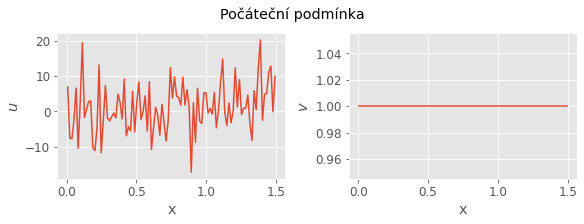

Output()

In [12]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)
ggg = sy.N(gg)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)

display(eq.expressions)

grid_size = 100
domain_size = sy.N(l) #np.pi
grid = pde.CartesianGrid([[0, domain_size]], [grid_size], periodic=False)

u0 = pde.ScalarField.random_normal(grid, label="$u$")
v0 = pde.ScalarField(grid, 1, label="$v$")

state = pde.FieldCollection([u0, v0])
state.plot(action="show", title='Počáteční podmínka')

tracker = pde.PlotTracker(interval=.1)
solver = pde.ScipySolver(eq)

controller = pde.Controller(solver, t_range=1, tracker=tracker)
sol = controller.run(state, dt=1e-3)



{'u': '10.0*u**2*v - 10.0*u + laplace(u)',
 'v': '-10.0*u**2*v + 30.0*laplace(v) + 20.0'}

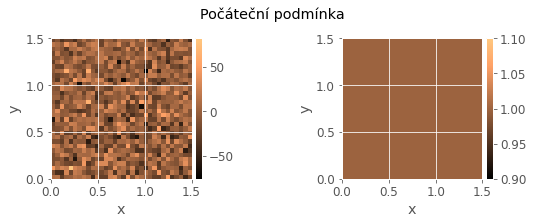

Output()

In [13]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)
ggg = sy.N(gg)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)

display(eq.expressions)

grid_size = 32
domain_size = sy.N(l)
grid = pde.CartesianGrid([[0,domain_size],[0,domain_size]], grid_size, periodic=False)

u0 = pde.ScalarField.random_normal(grid)
v0 = pde.ScalarField(grid, 1)

state = pde.FieldCollection([u0, v0])
state.plot(action="show", cmap="copper", title='Počáteční podmínka')


tracker = pde.PlotTracker(interval=.5, plot_args={'cmap':'copper'})
solver = pde.ScipySolver(eq)
controller = pde.Controller(solver, t_range=2, tracker=tracker)
sol = controller.run(state, dt=1e-3)


#sol.plot(action="show")

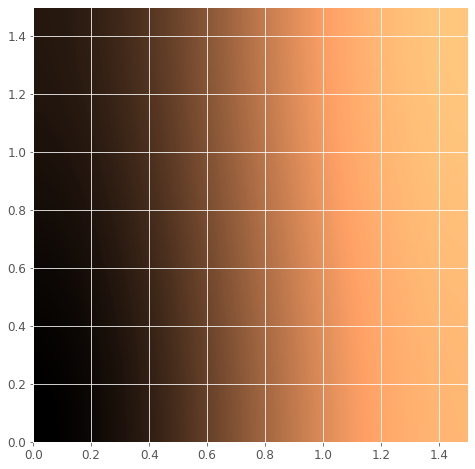

In [16]:
plt.imshow(sol.data[1].T, cmap=plt.cm.copper, aspect='equal', origin='lower', interpolation='bilinear', extent = [0 , float(domain_size), 0 , float(domain_size)], )
plt.show()

{'u': '9.0*u**2*v - 9.0*u + laplace(u)',
 'v': '-9.0*u**2*v + 130.0*laplace(v) + 18.0'}

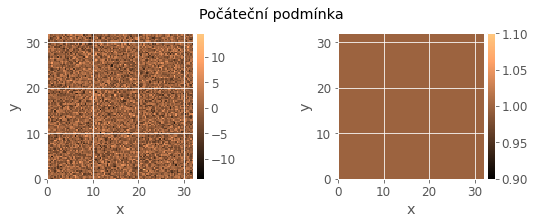

Output()

In [18]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)+100
ggg = 9 #400 #sy.N(gamma_n)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)

display(eq.expressions)

grid_size = 100
domain_size = 32 #sy.N(l)
grid = pde.CartesianGrid([[0,domain_size],[0,domain_size]], grid_size, periodic=False)

u0 = pde.ScalarField.random_normal(grid)
v0 = pde.ScalarField(grid, 1)

state = pde.FieldCollection([u0, v0])
state.plot(action="show", cmap="copper", title='Počáteční podmínka')


tracker = pde.PlotTracker(interval=.5, plot_args={'cmap':'copper'})
solver = pde.ScipySolver(eq)
controller = pde.Controller(solver, t_range=3, tracker=tracker)
sol = controller.run(state, dt=1e-3)

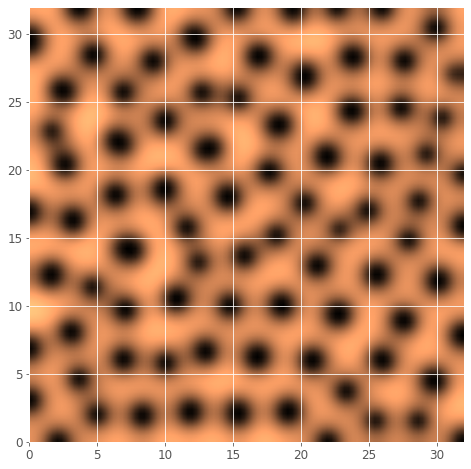

In [19]:
plt.imshow(sol.data[1], cmap=plt.cm.copper, aspect='equal', origin='lower', interpolation='bilinear', extent = [0 , float(domain_size), 0 , float(domain_size)], )
plt.show()

{'u': '289.0*u**2*v - 289.0*u + laplace(u)',
 'v': '-289.0*u**2*v + 130.0*laplace(v) + 578.0'}

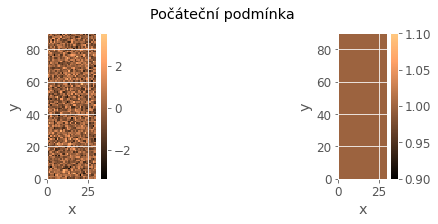

Output()

In [33]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)+100
ggg = 289 #400 #sy.N(gamma_n)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)

display(eq.expressions)

domain_size_x = 10 #sy.N(l)
domain_size_y = 30

grid_size_x = domain_size_x * 3
grid_size_y = domain_size_y * 3


#grid = pde.CartesianGrid([[0,domain_size_x],[0,domain_size_y]], [[0,grid_size_x],[0,grid_size_y]], periodic=False)
grid = pde.UnitGrid([grid_size_x, grid_size_y])

u0 = pde.ScalarField.random_normal(grid)
v0 = pde.ScalarField(grid, 1)

state = pde.FieldCollection([u0, v0])
state.plot(action="show", cmap="copper", title='Počáteční podmínka')


tracker = pde.PlotTracker(interval=.5, plot_args={'cmap':'copper'})
solver = pde.ScipySolver(eq)
controller = pde.Controller(solver, t_range=3, tracker=tracker)
sol = controller.run(state, dt=1e-3)

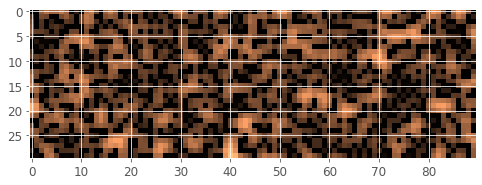

In [34]:
plt.imshow(sol.data[1], cmap=plt.cm.copper, aspect='equal' )
plt.show()

{'u': '80.0*u**2*v - 80.0*u + laplace(u)',
 'v': '-80.0*u**2*v + 30.0*laplace(v) + 160.0'}

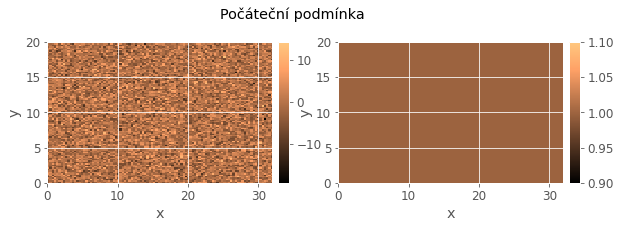

Output()

In [42]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = 30#sy.N(dd)+100
ggg = 80 #400 #sy.N(gamma_n)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)

display(eq.expressions)

grid_size = 100
domain_size = 32 #sy.N(l)
grid = pde.CartesianGrid([[0,domain_size],[0,20]], grid_size, periodic=False)

u0 = pde.ScalarField.random_normal(grid)
v0 = pde.ScalarField(grid, 1)

state = pde.FieldCollection([u0, v0])
state.plot(action="show", cmap="copper", title='Počáteční podmínka')


tracker = pde.PlotTracker(interval=.5, plot_args={'cmap':'copper'})
solver = pde.ScipySolver(eq)
controller = pde.Controller(solver, t_range=3, tracker=tracker)
sol = controller.run(state, dt=1e-3)

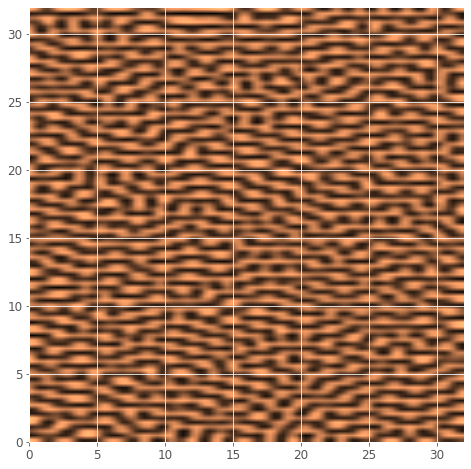

In [43]:
plt.imshow(sol.data[1], cmap=plt.cm.copper, aspect='equal', origin='lower', interpolation='bilinear', extent = [0 , float(domain_size), 0 , float(domain_size)], )
plt.show()

In [49]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a, b = 1, 3
d0, d1 = 1, 2
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
grid = UnitGrid([64, 64])
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# simulate the pde
tracker = PlotTracker(interval=1, plot_args={"vmin": 0, "vmax": 5})
sol = eq.solve(state, t_range=20, dt=1e-3, tracker=tracker)

Output()

Spent more time on handling trackers (14.655295000000024) than on the actual simulation (3.3566410000000815)
